In [8]:
import pandas as pd
import umap
import numpy
import matplotlib.pyplot as plt
from tcrdist.repertoire import TCRrep

In [9]:
VDJdb_TRA_human_fix = pd.read_csv('VDJdb_TRA_human_fix.csv')
display(VDJdb_TRA_human_fix)

df_alpha = VDJdb_TRA_human_fix[0:2000]
tr_alpha = TCRrep(cell_df = df_alpha,
            organism = 'human',
            chains = ['alpha'],
            deduplicate = False,
            db_file = "alphabeta_gammadelta_db.tsv",
            compute_distances=False)

,gene,cdr3_a_aa,v_a_gene,j_a_gene,species,antigen.epitope,antigen.species,count
0,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,HIV-1,1
1,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,HIV-1,1
2,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,FLKEKGGL,HIV-1,1
3,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL,HIV-1,1
4,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEQGGL,HIV-1,1
...,...,...,...,...,...,...,...,...
34183,TRA,CAVYNQGGKLIF,TRAV8-1*01,TRAJ23*01,HomoSapiens,QYIKWPWYI,SARS-CoV-2,1
34184,TRA,CAVRALYNFNKFYF,TRAV3*01,TRAJ21*01,HomoSapiens,QYIKWPWYI,SARS-CoV-2,1
34185,TRA,CAVESYNTDKLIF,TRAV41*01,TRAJ34*01,HomoSapiens,QYIKWPWYI,SARS-CoV-2,1
34186,TRA,CLVGENSGGFKTIF,TRAV4*01,TRAJ9*01,HomoSapiens,QYIKWPWYI,SARS-CoV-2,1


In [10]:
# Compute alpha chain distance matrix 
tr_alpha.compute_distances()

In [11]:
# Print distance matrix
dist_matrix_alpha = tr_alpha.pw_alpha
print(dist_matrix_alpha)

[[  0 138 125 ... 158 161 195]
 [138   0 138 ... 137 125 198]
 [125 138   0 ... 154 174 201]
 ...
 [158 137 154 ...   0 154 156]
 [161 125 174 ... 154   0 183]
 [195 198 201 ... 156 183   0]]


[ 7  7  7 ... 13 13 13]
[[ 8.891103  13.879377 ]
 [ 5.665461  10.698949 ]
 [10.433686  13.492199 ]
 ...
 [ 2.1411352  8.376977 ]
 [ 7.23359   12.790604 ]
 [ 7.9133644 10.189412 ]]


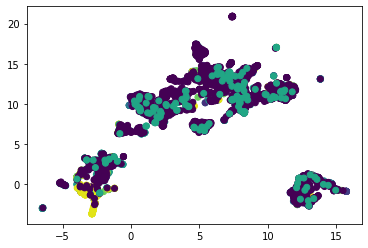

In [14]:
umap_TRA = umap.UMAP(random_state=42, n_components=2)

VDJ_test = VDJdb_TRA_human_fix[0:2000]
TRA_epitope_label = VDJ_test['antigen.species']
TRA_epitope_label = pd.Categorical(TRA_epitope_label).codes
print(TRA_epitope_label)

TRA_umap_fit = umap_TRA.fit_transform(dist_matrix_alpha)
print(TRA_umap_fit)
#fig = plt.figure()
#sub = fig.add_subplot(111)
#sub.scatter(TRA_umap_fit[0], TRA_umap_fit[1], c = TRA_epitope_lable)
plt.scatter(TRA_umap_fit[:,0], TRA_umap_fit[:,1], c = TRA_epitope_label)